In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
nt = pd.read_csv('netflix.csv')
nt.shape

(8807, 12)

In [3]:
nt.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,25-Sep-21,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,24-Sep-21,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,24-Sep-21,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
nt['show_id'].describe()

count     8807
unique    8807
top         s1
freq         1
Name: show_id, dtype: object

In [5]:
nt['type'].describe()

count      8807
unique        2
top       Movie
freq       6131
Name: type, dtype: object

In [6]:
nt['date_added'].describe()

count         8797
unique        1767
top       1-Jan-20
freq           109
Name: date_added, dtype: object

In [7]:
nt['release_year'].describe()

count    8807.000000
mean     2014.180198
std         8.819312
min      1925.000000
25%      2013.000000
50%      2017.000000
75%      2019.000000
max      2021.000000
Name: release_year, dtype: float64

In [8]:
nt.count()

show_id         8807
type            8807
title           8807
director        6173
cast            7982
country         7976
date_added      8797
release_year    8807
rating          8803
duration        8804
listed_in       8807
description     8807
dtype: int64

In [9]:
nt.nunique()

show_id         8807
type               2
title           8804
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

In [10]:
nt['country'].value_counts()[:1]

United States    2818
Name: country, dtype: int64

In [12]:
nt[nt['type'] == 'TV Show']['duration'].value_counts()

1 Season      1793
2 Seasons      425
3 Seasons      199
4 Seasons       95
5 Seasons       65
6 Seasons       33
7 Seasons       23
8 Seasons       17
9 Seasons        9
10 Seasons       7
13 Seasons       3
15 Seasons       2
12 Seasons       2
11 Seasons       2
17 Seasons       1
Name: duration, dtype: int64

In [13]:
nt[nt['country'] == 'United States']['listed_in'].value_counts()
#what type of content and with what frequency is available in each country 

Documentaries                                         249
Stand-Up Comedy                                       209
Children & Family Movies, Comedies                     90
Dramas                                                 88
Comedies                                               84
                                                     ... 
International TV Shows, Reality TV, TV Comedies         1
Kids' TV, TV Action & Adventure, TV Dramas              1
Anime Series, Crime TV Shows                            1
Anime Features, Music & Musicals, Sci-Fi & Fantasy      1
Cult Movies, Dramas, Thrillers                          1
Name: listed_in, Length: 310, dtype: int64

In [14]:
nt[nt['type'] == 'TV Show'].nunique()

show_id         2676
type               1
title           2675
director         222
cast            2283
country          196
date_added      1051
release_year      46
rating             9
duration          15
listed_in        236
description     2672
dtype: int64

In [15]:
nt[nt['type'] == 'Movie'].nunique()

show_id         6131
type               1
title           6129
director        4354
cast            5445
country          651
date_added      1533
release_year      73
rating            17
duration         205
listed_in        278
description     6105
dtype: int64

In [16]:
d_a = nt[nt['type'] == 'TV Show']['date_added']
#converting to datetime 
d_adt =  pd.to_datetime(d_a)
#extracting the most frequent month of launch
m_fl =  d_adt.dt.month.value_counts()

In [17]:
m_fl

12.0    266
7.0     262
9.0     251
8.0     236
6.0     236
10.0    215
4.0     214
3.0     213
11.0    207
5.0     193
1.0     192
2.0     181
Name: date_added, dtype: int64

In [19]:
nt[(nt['type'] == 'TV Show') & (nt['listed_in'] == 'Reality TV')]['director'].value_counts()
#for TV shows that are Reality TV we an find the details of only one director as the details of the directors of the rest 
#aren't available

Michael Simon    1
Name: director, dtype: int64

In [20]:
nt.shape

(8807, 12)

In [21]:
# Answer to point 2)
#Observations on the shape of data, data types of all the attributes, conversion of categorical attributes to 'category' 
#(If required), missing value detection, statistical summary

nt.shape

(8807, 12)

In [22]:
nt.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [23]:
#converting date added from string to datetime

nt['date_added'] = pd.to_datetime(nt['date_added'])

In [54]:
# null value detection
nl_nt = nt.notnull()

In [55]:
nl_nt['director'].value_counts()

True     6173
False    2634
Name: director, dtype: int64

In [26]:
#statsitical summary
include = ['object', 'int']
nt.describe(include = include)

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8807.000000,8803,8804,8807,8807
unique,8807,2,8804,4528,7692,748,NaN,17,220,514,8775
top,s1,Movie,15-Aug,Rajiv Chilaka,David Attenborough,United States,NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,2,19,19,2818,NaN,3207,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


In [27]:
#3) Answer to point 3)
# Non-Graphical Analysis: Value counts and unique attributes

In [29]:
nt.value_counts()

show_id  type   title                director             cast                                                                                                                                                                           country                                                 date_added  release_year  rating  duration  listed_in                                         description                                                                                                                                             
s10      Movie  The Starling         Theodore Melfi       Melissa McCarthy, Chris O'Dowd, Kevin Kline, Timothy Olyphant, Daveed Diggs, Skyler Gisondo, Laura Harrier, Rosalind Chao, Kimberly Quinn, Loretta Devine, Ravi Kapoor         United States                                           2021-09-24  2021          PG-13   104 min   Comedies, Dramas                                  A woman adjusting to life after a loss contends with a feisty bird that's taken o

In [30]:
#5332 rows wherein there are non NaN / null values

nt.shape

(8807, 12)

In [33]:
# Value counts and unique attributes column wise


In [34]:
nt['show_id'].value_counts()

s1       1
s5875    1
s5869    1
s5870    1
s5871    1
        ..
s2931    1
s2930    1
s2929    1
s2928    1
s8807    1
Name: show_id, Length: 8807, dtype: int64

In [60]:
pd.unique(nt[nl_nt['show_id']]['show_id'])

array(['s1', 's2', 's3', ..., 's8805', 's8806', 's8807'], dtype=object)

In [61]:
nt.nunique()

show_id         8807
type               2
title           8804
director        4528
cast            7692
country          748
date_added      1714
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

In [62]:
nt['type'].value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

In [59]:
pd.unique(nt[nl_nt['type']]['type'])

array(['Movie', 'TV Show'], dtype=object)

In [45]:
nt['title'].value_counts()

15-Aug                                    2
9-Feb                                     2
22-Jul                                    2
The Ridiculous 6                          1
Mike Epps: Don't Take It Personal         1
                                         ..
Good Time                                 1
Captain Underpants Epic Choice-o-Rama     1
We Bare Bears                             1
To All the Boys: P.S. I Still Love You    1
Zubaan                                    1
Name: title, Length: 8804, dtype: int64

In [58]:
pd.unique(nt[nl_nt['title']]['title'])

array(['Dick Johnson Is Dead', 'Blood & Water', 'Ganglands', ...,
       'Zombieland', 'Zoom', 'Zubaan'], dtype=object)

In [47]:
nt['director'].value_counts()

Rajiv Chilaka                     19
Raúl Campos, Jan Suter            18
Marcus Raboy                      16
Suhas Kadav                       16
Jay Karas                         14
                                  ..
Raymie Muzquiz, Stu Livingston     1
Joe Menendez                       1
Eric Bross                         1
Will Eisenberg                     1
Mozez Singh                        1
Name: director, Length: 4528, dtype: int64

In [57]:
pd.unique(nt[nl_nt['director']]['director'])

array(['Kirsten Johnson', 'Julien Leclercq', 'Mike Flanagan', ...,
       'Majid Al Ansari', 'Peter Hewitt', 'Mozez Singh'], dtype=object)

In [49]:
nt['cast'].value_counts()

David Attenborough                                                                                                                                                                            19
Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jigna Bhardwaj, Rajesh Kava, Mousam, Swapnil                                                                                                       14
Samuel West                                                                                                                                                                                   10
Jeff Dunham                                                                                                                                                                                    7
David Spade, London Hughes, Fortune Feimster                                                                                                                                                   6
                                   

In [56]:
pd.unique(nt[nl_nt['cast']]['cast'])

array(['Ama Qamata, Khosi Ngema, Gail Mabalane, Thabang Molaba, Dillon Windvogel, Natasha Thahane, Arno Greeff, Xolile Tshabalala, Getmore Sithole, Cindy Mahlangu, Ryle De Morny, Greteli Fincham, Sello Maake Ka-Ncube, Odwa Gwanya, Mekaila Mathys, Sandi Schultz, Duane Williams, Shamilla Miller, Patrick Mofokeng',
       'Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabiha Akkari, Sofia Lesaffre, Salim Kechiouche, Noureddine Farihi, Geert Van Rampelberg, Bakary Diombera',
       'Mayur More, Jitendra Kumar, Ranjan Raj, Alam Khan, Ahsaas Channa, Revathi Pillai, Urvi Singh, Arun Kumar',
       ...,
       'Jesse Eisenberg, Woody Harrelson, Emma Stone, Abigail Breslin, Amber Heard, Bill Murray, Derek Graf',
       'Tim Allen, Courteney Cox, Chevy Chase, Kate Mara, Ryan Newman, Michael Cassidy, Spencer Breslin, Rip Torn, Kevin Zegers',
       'Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanana, Manish Chaudhary, Meghna Malik, Malkeet Rauni, Anita Shabdish, Chittaranjan Tripathy'],
      dtype=obje

In [63]:
nt['country'].value_counts()

United States                             2818
India                                      972
United Kingdom                             419
Japan                                      245
South Korea                                199
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: country, Length: 748, dtype: int64

In [64]:
pd.unique(nt[nl_nt['country']]['country'])

array(['United States', 'South Africa', 'India',
       'United States, Ghana, Burkina Faso, United Kingdom, Germany, Ethiopia',
       'United Kingdom', 'Germany, Czech Republic', 'Mexico', 'Turkey',
       'Australia', 'United States, India, France', 'Finland',
       'China, Canada, United States',
       'South Africa, United States, Japan', 'Nigeria', 'Japan',
       'Spain, United States', 'France', 'Belgium',
       'United Kingdom, United States', 'United States, United Kingdom',
       'France, United States', 'South Korea', 'Spain',
       'United States, Singapore', 'United Kingdom, Australia, France',
       'United Kingdom, Australia, France, United States',
       'United States, Canada', 'Germany, United States',
       'South Africa, United States', 'United States, Mexico',
       'United States, Italy, France, Japan',
       'United States, Italy, Romania, United Kingdom',
       'Australia, United States', 'Argentina, Venezuela',
       'United States, United Kingdom,

In [66]:
nt['date_added'].value_counts()

2020-01-01    110
2019-11-01     91
2018-03-01     75
2019-12-31     74
2018-10-01     71
             ... 
2017-02-21      1
2017-02-07      1
2017-01-29      1
2017-01-25      1
2020-01-11      1
Name: date_added, Length: 1714, dtype: int64

In [67]:
pd.unique(nt[nl_nt['date_added']]['date_added'])

array(['2021-09-25T00:00:00.000000000', '2021-09-24T00:00:00.000000000',
       '2021-09-23T00:00:00.000000000', ...,
       '2018-12-06T00:00:00.000000000', '2016-03-09T00:00:00.000000000',
       '2020-01-11T00:00:00.000000000'], dtype='datetime64[ns]')

In [68]:
nt['release_year'].value_counts()

2018    1147
2017    1032
2019    1030
2020     953
2016     902
        ... 
1959       1
1925       1
1961       1
1947       1
1966       1
Name: release_year, Length: 74, dtype: int64

In [69]:
pd.unique(nt[nl_nt['release_year']]['release_year'])

array([2020, 2021, 1993, 2018, 1996, 1998, 1997, 2010, 2013, 2017, 1975,
       1978, 1983, 1987, 2012, 2001, 2014, 2002, 2003, 2004, 2011, 2008,
       2009, 2007, 2005, 2006, 1994, 2015, 2019, 2016, 1982, 1989, 1990,
       1991, 1999, 1986, 1992, 1984, 1980, 1961, 2000, 1995, 1985, 1976,
       1959, 1988, 1981, 1972, 1964, 1945, 1954, 1979, 1958, 1956, 1963,
       1970, 1973, 1925, 1974, 1960, 1966, 1971, 1962, 1969, 1977, 1967,
       1968, 1965, 1946, 1942, 1955, 1944, 1947, 1943], dtype=int64)

In [70]:
nt['rating'].value_counts()

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64

In [71]:
pd.unique(nt[nl_nt['rating']]['rating'])

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR',
       'TV-Y7-FV', 'UR'], dtype=object)

In [72]:
nt['duration'].value_counts()

1 Season     1793
2 Seasons     425
3 Seasons     199
90 min        152
94 min        146
             ... 
16 min          1
186 min         1
193 min         1
189 min         1
191 min         1
Name: duration, Length: 220, dtype: int64

In [73]:
pd.unique(nt[nl_nt['duration']]['duration'])

array(['90 min', '2 Seasons', '1 Season', '91 min', '125 min',
       '9 Seasons', '104 min', '127 min', '4 Seasons', '67 min', '94 min',
       '5 Seasons', '161 min', '61 min', '166 min', '147 min', '103 min',
       '97 min', '106 min', '111 min', '3 Seasons', '110 min', '105 min',
       '96 min', '124 min', '116 min', '98 min', '23 min', '115 min',
       '122 min', '99 min', '88 min', '100 min', '6 Seasons', '102 min',
       '93 min', '95 min', '85 min', '83 min', '113 min', '13 min',
       '182 min', '48 min', '145 min', '87 min', '92 min', '80 min',
       '117 min', '128 min', '119 min', '143 min', '114 min', '118 min',
       '108 min', '63 min', '121 min', '142 min', '154 min', '120 min',
       '82 min', '109 min', '101 min', '86 min', '229 min', '76 min',
       '89 min', '156 min', '112 min', '107 min', '129 min', '135 min',
       '136 min', '165 min', '150 min', '133 min', '70 min', '84 min',
       '140 min', '78 min', '7 Seasons', '64 min', '59 min', '139 min',
    

In [74]:
nt['listed_in'].value_counts()

Dramas, International Movies                          362
Documentaries                                         359
Stand-Up Comedy                                       334
Comedies, Dramas, International Movies                274
Dramas, Independent Movies, International Movies      252
                                                     ... 
Kids' TV, TV Action & Adventure, TV Dramas              1
TV Comedies, TV Dramas, TV Horror                       1
Children & Family Movies, Comedies, LGBTQ Movies        1
Kids' TV, Spanish-Language TV Shows, Teen TV Shows      1
Cult Movies, Dramas, Thrillers                          1
Name: listed_in, Length: 514, dtype: int64

In [75]:
pd.unique(nt[nl_nt['listed_in']]['listed_in'])

array(['Documentaries', 'International TV Shows, TV Dramas, TV Mysteries',
       'Crime TV Shows, International TV Shows, TV Action & Adventure',
       'Docuseries, Reality TV',
       'International TV Shows, Romantic TV Shows, TV Comedies',
       'TV Dramas, TV Horror, TV Mysteries', 'Children & Family Movies',
       'Dramas, Independent Movies, International Movies',
       'British TV Shows, Reality TV', 'Comedies, Dramas',
       'Crime TV Shows, Docuseries, International TV Shows',
       'Dramas, International Movies',
       'Children & Family Movies, Comedies',
       'British TV Shows, Crime TV Shows, Docuseries',
       'TV Comedies, TV Dramas', 'Documentaries, International Movies',
       'Crime TV Shows, Spanish-Language TV Shows, TV Dramas',
       'Thrillers',
       'International TV Shows, Spanish-Language TV Shows, TV Action & Adventure',
       'International TV Shows, TV Action & Adventure, TV Dramas',
       'Comedies, International Movies',
       'Comedies, 

In [82]:
nt['listed_in'][1].split(',')

['International TV Shows', ' TV Dramas', ' TV Mysteries']

In [83]:
nt['description'].value_counts()

Paranormal activity at a lush, abandoned property alarms a group eager to redevelop the site, but the eerie events may not be as unearthly as they think.    4
Challenged to compose 100 songs before he can marry the girl he loves, a tortured but passionate singer-songwriter embarks on a poignant musical journey.    3
A surly septuagenarian gets another chance at her 20s after having her photo snapped at a studio that magically takes 50 years off her life.                 3
Multiple women report their husbands as missing but when it appears they are looking for the same man, a police officer traces their cryptic connection.     3
Secrets bubble to the surface after a sensual encounter and an unforeseen crime entangle two friends and a woman caught between them.                        2
                                                                                                                                                            ..
Sent away to evade an arranged marriage, a 14-

In [84]:
pd.unique(nt[nl_nt['description']]['description'])

array(['As her father nears the end of his life, filmmaker Kirsten Johnson stages his death in inventive and comical ways to help them both face the inevitable.',
       'After crossing paths at a party, a Cape Town teen sets out to prove whether a private-school swimming star is her sister who was abducted at birth.',
       'To protect his family from a powerful drug lord, skilled thief Mehdi and his expert team of robbers are pulled into a violent and deadly turf war.',
       ...,
       'Looking to survive in a world taken over by zombies, a dorky college student teams with an urban roughneck and a pair of grifter sisters.',
       'Dragged from civilian life, a former superhero must train a new crop of youthful saviors when the military preps for an attack by a familiar villain.',
       "A scrappy but poor boy worms his way into a tycoon's dysfunctional family, while facing his fear of music and the truth about his past."],
      dtype=object)

In [85]:
#4) Visual analysis
nt.nunique()

show_id         8807
type               2
title           8804
director        4528
cast            7692
country          748
date_added      1714
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

In [86]:
#show id, title, description and a very high value of unique values hence if treated as continous or category won't give any
#meaningful insights


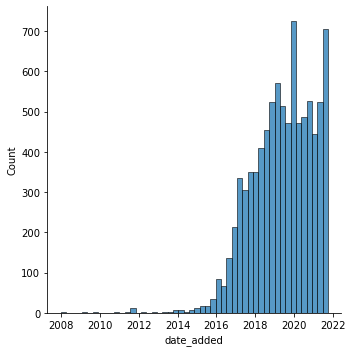

In [114]:
#univariate analysis

#1) Date Added
sns.displot(nt.date_added, bins = 50)

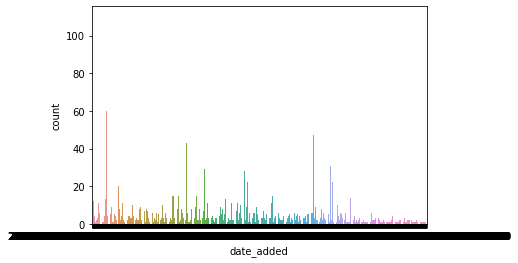

In [115]:
da_cplt = sns.countplot(x = 'date_added', data = nt)

<AxesSubplot:xlabel='date_added', ylabel='Count'>

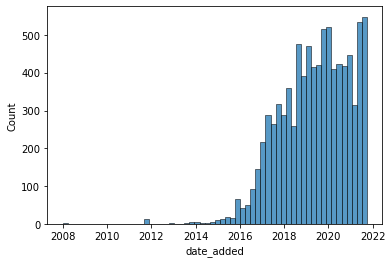

In [117]:
sns.histplot(data = nt, x = 'date_added')

In [ ]:
#2) Rating

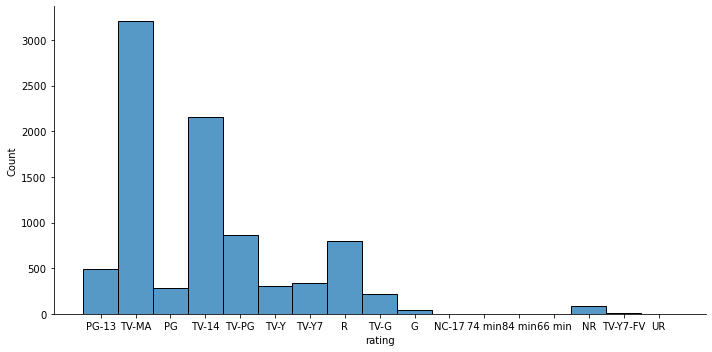

In [204]:
sns.displot(nt.rating, aspect = 2)

<AxesSubplot:xlabel='rating', ylabel='count'>

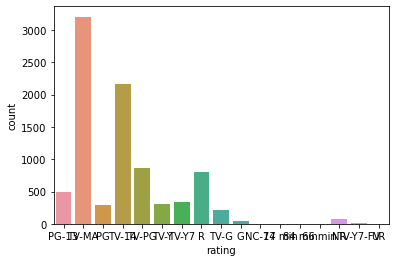

In [196]:
sns.countplot(x = 'rating', data = nt)

<AxesSubplot:xlabel='rating', ylabel='Count'>

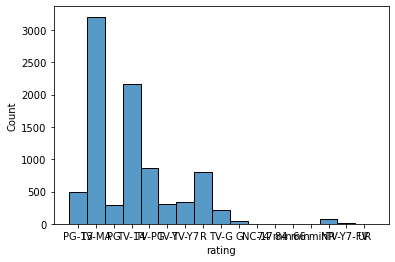

In [140]:
sns.histplot(data = nt, x = 'rating')

In [ ]:
#3) Duration

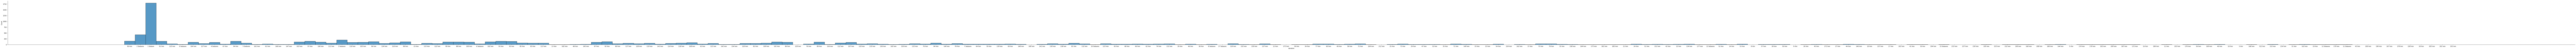

In [203]:
sns.displot(nt.duration, bins = 220, aspect = 50)

<AxesSubplot:xlabel='duration', ylabel='count'>

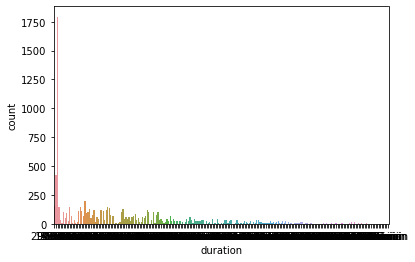

In [128]:
sns.countplot(x = 'duration', data = nt)

<AxesSubplot:xlabel='duration', ylabel='Count'>

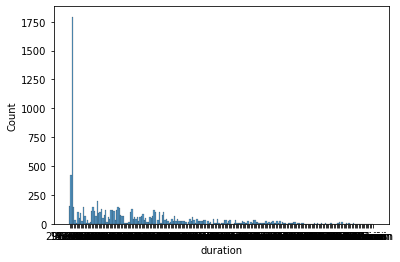

In [129]:
sns.histplot(data = nt, x = 'duration')

<AxesSubplot:xlabel='release_year'>

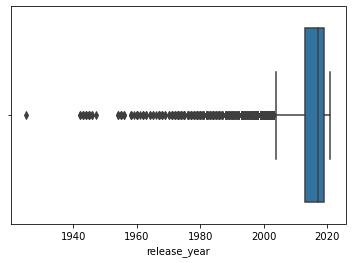

In [133]:
#Category variables

#release year
sns.boxplot(x="release_year", data=nt)

In [ ]:
#For correlation
#Heatmaps and pairplots

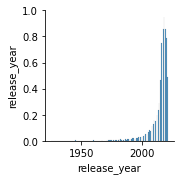

In [188]:
#in order to plot heatmaps and pairplots 
sns.pairplot(nt)


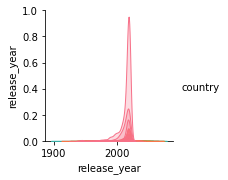

In [189]:
sns.pairplot(nt, hue='country')


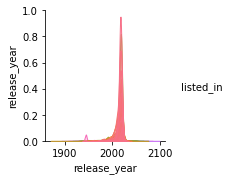

In [190]:
sns.pairplot(nt, hue='listed_in')


In [ ]:
#Missing values and outlier treatment





In [179]:
nt_n = nt.isnull()

In [181]:
nt['director'].fillna("None")

0       Kirsten Johnson
1                  None
2       Julien Leclercq
3                  None
4                  None
             ...       
8802      David Fincher
8803               None
8804    Ruben Fleischer
8805       Peter Hewitt
8806        Mozez Singh
Name: director, Length: 8807, dtype: object

In [182]:
nt['country'].fillna("All")

0       United States
1        South Africa
2                 All
3                 All
4               India
            ...      
8802    United States
8803              All
8804    United States
8805    United States
8806            India
Name: country, Length: 8807, dtype: object

In [193]:
nt['date_added'].min()

Timestamp('2008-01-01 00:00:00')

In [192]:
nt['date_added'].max()

Timestamp('2021-09-25 00:00:00')

In [215]:
nt['rel_month'] =  pd.DatetimeIndex(nt['date_added']).month

In [217]:
nt['rel_month'].describe()

count    8797.000000
mean        6.654996
std         3.436554
min         1.000000
25%         4.000000
50%         7.000000
75%        10.000000
max        12.000000
Name: rel_month, dtype: float64